<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center" font-weight="bold">Tarea-Práctica 7.</h1> 
<h2 align="center">Métodos de solución numérica para ecuaciones lineales y no lineales</h2> 
<hr>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import constants

plt.rcParams.update({
    "text.usetex": True,
})

<h2>1. Descomposición LU</h2>

<h3>(a), (b) y (c)</h3>

Calcula la descomposición LU de la matriz:

$$
    \begin{equation}
        \begin{pmatrix}
            2 & 1 & 4 & 2\\
            3 & 4 & -1 & -1\\
            1 & -4 & 1 & 5\\
            2 & -2 & 1 & 3
        \end{pmatrix}
        \begin{pmatrix}
        w \\ x \\ y \\ z
        \end{pmatrix}
        =
        \begin{pmatrix}
            -4\\ 3\\ 9\\ 7
        \end{pmatrix}
        \label{eq:sistema}
    \end{equation}
$$

In [2]:
A = np.array([[2, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7], float)

# Descomposición LU
dim, _ = A.shape # Dimensión de la matriz

U_temp = [] # [L0, L1, L2, L3]
AA = A.copy() # Copia para no modificar la matriz original
U = np.identity(dim) # Matriz identidad para U
L = np.identity(dim) # Matriz identidad para L

for n in range(dim):
    L_n = np.identity(dim)
    pivote = AA[n, n]
    AA[n, :] /= pivote
    v[n]  /= pivote

    for ele in range(n + 1, dim):
        mult = AA[ele, n]
        L_n[ele, n] = -mult / pivote
        AA[ele, :] -= mult * AA[n, :]
        v[ele] -= mult * v[n]
        
    U_temp.append(L_n) 
    U = L_n @ U #L0L1L2L3

############# Obtención de las matrices L y U
# Matriz L
for L_n in U_temp:
    L = L @ np.linalg.inv(L_n)

# Matriz U = L3L2L1L0A
U = U @ A

############# Backsubstitution
x = np.empty(dim, float) # Vector vacío

for m in range(dim - 1, -1, -1):
    x[m] = v[m]
    for i in range(m + 1, dim):
        x[m] -= AA[m, i] * x[i]

print("Descomposición LU")
print(f"La matriz original es: \n{A}")
# Recuperamos la matriz original LU = A
print("Multiplicación de las matrices L y U")
print(f"LU = A: \n{L @ U}")
print("Obtención de la solución del sistema de ecuaciones:")
print(f"La solución del sistema es:\n x = {x}")

Descomposición LU
La matriz original es: 
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Multiplicación de las matrices L y U
LU = A: 
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Obtención de la solución del sistema de ecuaciones:
La solución del sistema es:
 x = [ 2. -1. -2.  1.]


<h3>(d) Convierte tu programa en función y resuelve el sistema</h3>

In [3]:
def LU_decomposition_solution(A, v):
    """
    Parámetros
    ------------
    A: Matriz de coeficientes
    v: Vector de términos independientes

    Devuelve
    ------------
    L: Matriz L de la descomposición LU
    U: Matriz U de la descomposición LU
    x: Solución del sistema
    """
    
    dim, _ = A.shape # Dimensión de la matriz

    # Verificamos si no tiene solución o infinitas soluciones
    # Teorema de Rouché-Frobenius
    rango = np.linalg.matrix_rank(A)
    m_aumentada = np.hstack((A, v.reshape(-1, 1)))
    rango_aum = np.linalg.matrix_rank(m_aumentada)

    if rango != rango_aum:
        raise ValueError("El sistema no tiene solución.")
    elif rango < rango_aum:
        raise ValueError("El sistema tiene infinitas soluciones.")
    

    # Cambiamos el tipo de dato de los arreglos para evitar cálculos erróneos
    A = A.astype(float)
    v = v.astype(float)

    U_temp = [] # [L0, L1, L2, L3]
    #  Copia de la matriz para la diagonalización
    B = A.copy()
    U = np.identity(dim) # Matriz identidad para U
    L = np.identity(dim) # Matriz identidad para L
    
    for n in range(dim):
        L_n = np.identity(dim)
        pivote = B[n, n]
        B[n, :] /= pivote
        v[n] /= pivote

        if pivote == 0:
            raise ValueError("El sistema tiene infinitas soluciones.")
    
        for ele in range(n + 1, dim):
            mult = B[ele, n]
            L_n[ele, n] = -mult / pivote
            B[ele, :] -= mult * B[n, :]
            v[ele] -= mult * v[n]
            
        U_temp.append(L_n) 
        U = L_n @ U #L0L1L2L3
        
    # Matriz L
    for L_n in U_temp:
        L = L @ np.linalg.inv(L_n)
    
    # Matriz U = L3L2L1L0A
    U = U @ A

    ##### Backsubstitution
    x = np.empty(dim, float) # Vector vacío
    for m in range(dim - 1, -1, -1):
        x[m] = v[m]

        for i in range(m + 1, dim):
            x[m] -= B[m, i] * x[i]

    return L, U, x

In [4]:
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7], float)

L, U, x = LU_decomposition_solution(A, v)
print(f"Descomposición LU:\n{L @ U}")
print(f"La solución del sistema es: {x}")

Descomposición LU:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
La solución del sistema es: [ 2. -1. -2.  1.]


<h3>(e) Usa numpy para resolver</h3>

In [5]:
A = np.array([[2, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7])

P, L, U = sp.linalg.lu(A)
print(f"Descomposición LU librería:\n {P @ L @ U}")

print("Solución del sistema de ecuaciones lineales")
print(sp.linalg.solve(A, v))

Descomposición LU librería:
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Solución del sistema de ecuaciones lineales
[ 2. -1. -2.  1.]


<h4>Solución a distintos sistemas de ecuaciones</h4>

In [6]:
B = np.array([[2, 3],
             [4, 9]])
w = np.array([6, 15])

L, U, sol = LU_decomposition_solution(B, w)
print(L @ U)
print(f"La solución obtenida con mi implementación es: {sol}")
print(f"Solución con paquetería scipy: {np.linalg.solve(B, w)}")
print(f"Solución con paquetería numpy: {sp.linalg.solve(B, w)}")

[[2. 3.]
 [4. 9.]]
La solución obtenida con mi implementación es: [1.5 1. ]
Solución con paquetería scipy: [1.5 1. ]
Solución con paquetería numpy: [1.5 1. ]


In [7]:
C = np.array([[3, 2, -1],
             [2, -2, 4],
             [-1, 0.5, -1]])
z = np.array([1, -2, 0])

L, U, sol = LU_decomposition_solution(C, z)
print(L @ U)
print(f"La solución obtenida con mi implementación es: {sol}")
print(f"Solución con paquetería scipy: {np.linalg.solve(C, z)}")
print(f"Solución con paquetería numpy: {sp.linalg.solve(C, z)}")

[[ 3.   2.  -1. ]
 [ 2.  -2.   4. ]
 [-1.   0.5 -1. ]]
La solución obtenida con mi implementación es: [ 1. -2. -2.]
Solución con paquetería scipy: [ 1. -2. -2.]
Solución con paquetería numpy: [ 1. -2. -2.]


In [8]:
D = np.array([[1, 3, -2],
             [3, 5, 6],
             [2, 4, 3]])
v = np.array([5, 7, 8])

L, U, sol = LU_decomposition_solution(D, v)
print(L @ U)
print(f"La solución obtenida con mi implementación es: {sol}")
print(f"Solución con paquetería scipy: {np.linalg.solve(D, v)}")
print(f"Solución con paquetería numpy: {sp.linalg.solve(D, v)}")

[[ 1.  3. -2.]
 [ 3.  5.  6.]
 [ 2.  4.  3.]]
La solución obtenida con mi implementación es: [-15.   8.   2.]
Solución con paquetería scipy: [-15.   8.   2.]
Solución con paquetería numpy: [-15.   8.   2.]


In [10]:
E = np.array([[1, 1, 2],
             [1, 1, 1],
             [2, 2, 2]])
w = np.array([3, 1, 2])

L, U, sol = LU_decomposition_solution(E, w)
print(L @ U)
print(f"La solución obtenida con mi implementación es: {sol}")

/tmp/ipykernel_3454/3669463623.py:42: RuntimeWarning: divide by zero encountered in divide
  B[n, :] /= pivote
/tmp/ipykernel_3454/3669463623.py:42: RuntimeWarning: invalid value encountered in divide
  B[n, :] /= pivote
/tmp/ipykernel_3454/3669463623.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  v[n] /= pivote


ValueError: El sistema tiene infinitas soluciones.

In [11]:
A = np.array([[1, 1], [1, 1]])
v = np.array([2, 3])
LU_decomposition_solution(A, v)

ValueError: El sistema no tiene solución.

In [12]:
A = np.array([[1, 2], [2, 4]])
v = np.array([3, 6])
LU_decomposition_solution(A, v)  

/tmp/ipykernel_3454/3669463623.py:42: RuntimeWarning: invalid value encountered in divide
  B[n, :] /= pivote
/tmp/ipykernel_3454/3669463623.py:43: RuntimeWarning: invalid value encountered in scalar divide
  v[n] /= pivote


ValueError: El sistema tiene infinitas soluciones.

<h2>2. Pozo cuántico asimétrico</h2>

<h3>(a) Demuestra que la ec. de Schrödinger se puede escribir en forma matricial</h3>

<h3>(b) Escribe un programa para evular tu expresión para $H_{mn}$</h3>

<span style="font-weight:bold">Operador Hamiltoniano</span>

$$
\begin{equation*}
    \hat{H} = -\dfrac{-\hbar^{2}}{2M}\dfrac{\text{d}^{2}}{\text{d}x^{2}} + V(x).
\end{equation*}
$$

<span style="font-weight:bold">Matriz asociada al Hamiltoniano $\mathbb{H}$</span>

$$
\begin{align*}
    H_{mn} &= \dfrac{2}{L}\int_{0}^{L}\sin\bigl(\tfrac{\pi mx}{L}\bigr)\hat{H}\sin\bigl(\tfrac{\pi n x}{L}\bigr)\text{d}x,\\
    H_{mn} &= \dfrac{2}{L}\int_{0}^{L}\sin\bigl(\tfrac{\pi mx}{L}\bigr)\Biggl[-\dfrac{-\hbar^{2}}{2M}\dfrac{\text{d}^{2}}{\text{d}x^{2}} + V(x)\Biggr]\sin\bigl(\tfrac{\pi n x}{L}\bigr)\text{d}x.
\end{align*}
$$

<span style="font-weight:bold">Potencial $V(x)$</span>

$$
    \begin{equation*}
        V(x) = \dfrac{ax}{L}
    \end{equation*}
$$

In [129]:
L = 5 * constants.angstrom # m
hbar = constants.hbar # J * s
m_e = constants.m_e # Masa del electrón en kg
c_e = constants.elementary_charge # Carga del electrón en C
a = 10 * c_e # J

In [132]:
def hamiltonian_mn(m, n, L):
    if m == n:
        return (hbar ** 2 * np.pi ** 2 * n ** 2) / (2 * m_e * L ** 2) +  a / 2
    elif ((m & 1) == (n & 1)):
        return 0 # Si ambos son pares o impares
    return -((8 * a) / (np.pi ** 2)) * ((m * n) / (m ** 2 - n ** 2) ** 2) # Uno par y otro impar

<h3>(c) Calcula los valores propios de esta matriz</h3>

In [133]:
def hamiltonian_op(m, n, L):    
    H = np.zeros((m, n), float)

    for i in range(m):
        for j in range(n):
            H[i, j] = hamiltonian_mn(i + 1, j + 1, L)

    # Eigenvalores y eigenvectores
    energias, ψ = sp.linalg.eigh(H)

    return energias / c_e, ψ

In [134]:
energias_10, _ = hamiltonian_op(10, 10, L)

print(energias_10)

[  5.8363769   11.18109291  18.66289158  29.14419776  42.65507485
  59.18525782  78.72936019 101.28548383 126.85138575 155.55532885]


<h3>(d) Usa una matriz $100\times 100$</h3>

In [146]:
energias_100, ψ = hamiltonian_op(100, 100, L)

print(f"Las primeras 10 energías para esta matriz son: \n{energias_100[0:10]}")

Las primeras 10 energías para esta matriz son: 
[  5.8363765   11.18109158  18.66288971  29.14418896  42.65506573
  59.18520524  78.72930836 101.2848529  126.85055342 155.42570639]


<h3>(e) Calcula la función de onda $\psi(x)$ para el estado fundamental y los dos primeros estados excitados</h3>

<span style="font-weight:bold">Función de onda</span>

$$
    \begin{equation*}
        \Psi(x) = \sum_{n = 1}^{\infty} \psi_{n}\sin\bigl(\tfrac{\pi n x}{L}\bigr)
    \end{equation*}
$$

In [149]:
def funcion_onda_n(n, x, psi, L):
    f_onda = 0
    for m in range(100):
        f_onda += np.sqrt(2 / L) * psi[n, m] * np.sin((np.pi * (m + 1) * x) / L)
    return f_onda

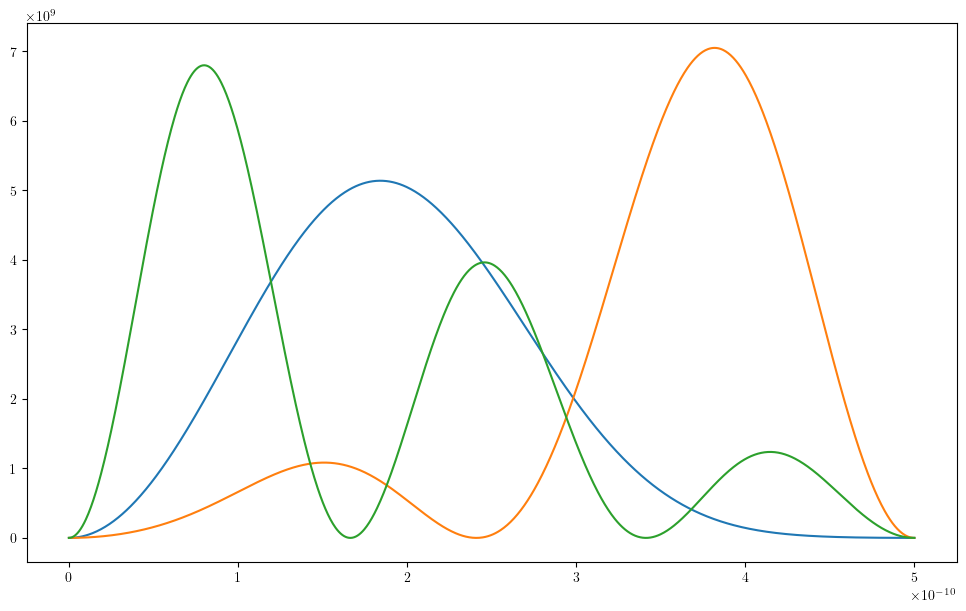

array([      0.        ,   87711.08638546,  350839.79155457,
        789372.45236745, 1403286.29307274, 2192549.41978849,
       3157120.81326927, 4296950.32040297, 5611978.64494039,
       7102137.33797808])

In [166]:
x = np.linspace(0, L, 1000)
ψ_0 = funcion_onda_n(0, x, ψ, L) 
ψ_1 = funcion_onda_n(1, x, ψ, L) 
ψ_2 = funcion_onda_n(2, x, ψ, L) 
# Funciones de densidad de probabilidad
ψ_0_prob = funcion_onda_n(0, x, ψ, L) ** 2
ψ_1_prob = funcion_onda_n(1, x, ψ, L) ** 2
ψ_2_prob = funcion_onda_n(2, x, ψ, L) ** 2

plt.figure(figsize=(12, 7))
plt.plot(x, ψ_0_prob)
plt.plot(x, ψ_1_prob)
plt.plot(x, ψ_2_prob)
plt.show()

<h2>3. Método de relajación</h2>

Considera la ecuación $x = 1 - \mathrm{e}^{-cx}$, donde $c$ es un parámetro conocido y $x$ desconocido.

<h3>(a) Resuelve la ecuación por método de relajación</h3>

In [ ]:
x = 1
c = 2
for k in range(100):
    x = 1 - np.exp(-c * x)
    print(x)

<h3>(b) Soluciones para valores de $c$ específicos</h3>

In [ ]:
C = np.linspace(0, 3, 300)
X = []

x = 0.5
for k in range(100):
    x = 1 - np.exp(-c * x)
for c in C:
    x = 1 - np.exp(-c * x)
    X.append(x)
        

In [ ]:
plt.plot(C, X)
plt.show()

<h2>4. Glucólisis</h2>

<h3>(a) Demuestre analíticamente las soluciones</h3>
La solución de estas ecuaciones es:

$$
    \begin{equation*}
        x = b,\qquad y= \dfrac{b}{a + b^{2}}
    \end{equation*}
$$

<h3>(b) Resuelve por método de relajación</h3>

<h3>(c) Encuentra una forma diferente de reorganizar</h3>

<h2>5. Constante de desplazamiento de Wien</h2>

<h3>(a) Demuestra que $\lambda$ obedece al desplazamiento de Wienley</h3>

<h3>(b) Resolver ecuación con precisión $\epsilon = 10^{-6}$</h3>

<h3>(c) Estima la temperatura de la superficie del Sol</h3>

<h2>6. El punto de Lagrange</h2>

<h3>(a) Demuestra que la distancia $r$ satisface una ecuación</h3>

<h3>(b) Resuelve usando el método de Newton</h3>